In [ ]:
#Data reading and visaulizing tools
import numpy as np
import math
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
%matplotlib inline

#preprocessing tools
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.tree import export_text, plot_tree,export_graphviz

#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Ensemble Models
#simple classifier
from sklearn.ensemble import VotingClassifier

#Bagging Classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Boosting Classifiers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier  #Extreme Gradient Boosting

#models performance evaulation tools
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

#additional tools
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel

from sklearn import set_config
set_config(display='diagram')

In [ ]:
#url='https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls'

### About this file
Data Set Information:

Cardiotocography (CTG) is a medical test that is used to monitor the fetal heart rate (FHR) and uterine contractions during pregnancy. A cardiotocogram (CTG) is the graphical representation of the results of this test.

During a CTG, two sensors are placed on the mother's abdomen: one to measure the fetal heart rate and the other to detect contractions of the uterus. The results of these measurements are recorded on a graph, which shows the fetal heart rate as a continuous line and the uterine contractions as intermittent spikes.

CTGs are commonly used during the antenatal period to assess fetal well-being and during labor to monitor fetal distress. They can help detect potential problems with the pregnancy or labor, such as fetal distress or hypoxia, and allow healthcare providers to take appropriate action to prevent complications and ensure the safe delivery of the baby.

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. …) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

Attribute Information:

LB - FHR baseline (beats per minute)

AC - # of accelerations per second

FM - # of fetal movements per second

UC - # of uterine contractions per second

DL - # of light decelerations per second

DS - # of severe decelerations per second

DP - # of prolongued decelerations per second

ASTV - percentage of time with abnormal short term variability

MSTV - mean value of short term variability

ALTV - percentage of time with abnormal long term variability

MLTV - mean value of long term variability

Width - width of FHR histogram

Min - minimum of FHR histogram

Max - Maximum of FHR histogram

Nmax - # of histogram peaks

Nzeros - # of histogram zeros

Mode - histogram mode

Mean - histogram mean

Median - histogram median

Variance - histogram variance

Tendency - histogram tendency

CLASS - FHR pattern class code (1 to 10)

NSP - fetal state class code (N=normal; S=suspect; P=pathologic)

In [ ]:
pd.options.display.max_columns= None
data=pd.read_excel('/content/drive/MyDrive/Ensembles_Models/CTG.xls', sheet_name = 1, skiprows = 1)
data

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Unnamed: 31,A,B,C,D,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,120.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,9.0,NaN,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,NaN,132.0,0.006380,0.000000,0.006380,0.003190,0.000000,0.000000,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,NaN,133.0,0.003322,0.000000,0.008306,0.003322,0.000000,0.000000,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,NaN,134.0,0.002561,0.000000,0.007682,0.002561,0.000000,0.000000,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,132.0,0.006515,0.000000,0.008143,0.000000,0.000000,0.000000,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,NaN,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,2.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1576.0,3049.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,NaN,140.0,0.000679,0.000000,0.006110,0.000000,0.000000,0.000000,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,NaN,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,5.0,NaN,2.0
2125,2796.0,3415.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,NaN,142.0,0.001616,0.001616,0.008078,0.000000,0.000000,0.000000,74.0,0.4,36.0,5.0,42.0,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,NaN,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,1.0,NaN,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,384.0,579.0,53.0,81.0,72.0,332.0,252.0,107.0,69.0,197.0,NaN,NaN,NaN,NaN


In [ ]:
#Let's drop the unecessary columns
data.drop(data.iloc[:, :10], inplace = True, axis = 1) 
data.drop(data.iloc[:, 22:33], inplace = True, axis = 1)

In [ ]:
data = data.drop(['Unnamed: 31', 'Unnamed: 44'], axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC.1      2126 non-null   float64
 2   FM.1      2127 non-null   float64
 3   UC.1      2127 non-null   float64
 4   DL.1      2128 non-null   float64
 5   DS.1      2128 non-null   float64
 6   DP.1      2128 non-null   float64
 7   ASTV      2127 non-null   float64
 8   MSTV      2127 non-null   float64
 9   ALTV      2127 non-null   float64
 10  MLTV      2127 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

In [ ]:
data.isna().sum()

LB          3
AC.1        3
FM.1        2
UC.1        2
DL.1        1
DS.1        1
DP.1        1
ASTV        2
MSTV        2
ALTV        2
MLTV        2
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
CLASS       3
NSP         3
dtype: int64

In [ ]:
data = data.dropna()
data = data.drop_duplicates()

In [ ]:
data.describe()

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
count,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000
mean,133.301655,0.003178,0.009501,0.004375,0.001894,0.000004,0.000157,46.977778,1.335035,9.789598,8.170922,70.511111,93.574468,164.085579,4.075650,0.325296,137.448227,134.596217,138.084161,18.891726,0.318676,4.507801,1.303546
std,9.836399,0.003864,0.046787,0.002935,0.002967,0.000063,0.000581,17.180933,0.884111,18.329675,5.632455,38.997589,29.550040,17.943983,2.951027,0.707507,16.398956,15.607096,14.476729,29.029413,0.611005,3.022826,0.614059
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001919,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,2.000000,1.000000
50%,133.000000,0.001637,0.000000,0.004505,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,68.000000,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,4.000000,1.000000
75%,140.000000,0.005650,0.002502,0.006536,0.003283,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,7.000000,1.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.000000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,10.000000,3.000000


In [ ]:
data.shape

(2115, 23)

### Data Visualization

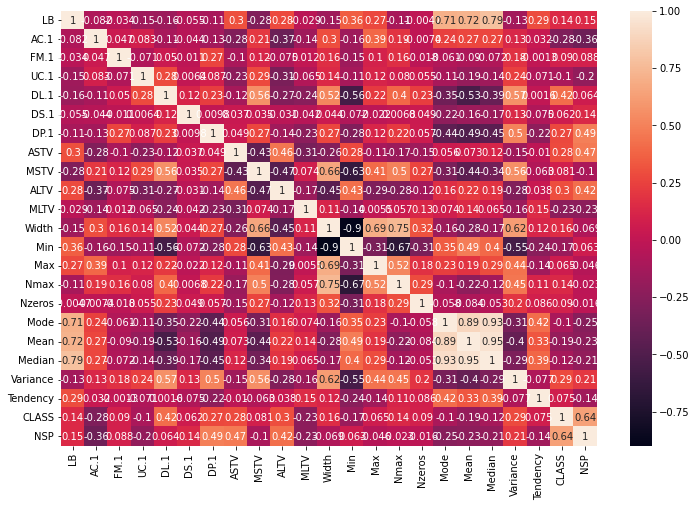

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

(array([  7.,  37.,  44., 106., 204., 199., 309., 279., 298., 147., 245.,
        144.,  57.,  12.,  27.]),
 array([106. , 109.6, 113.2, 116.8, 120.4, 124. , 127.6, 131.2, 134.8,
        138.4, 142. , 145.6, 149.2, 152.8, 156.4, 160. ]),
 <a list of 15 Patch objects>)

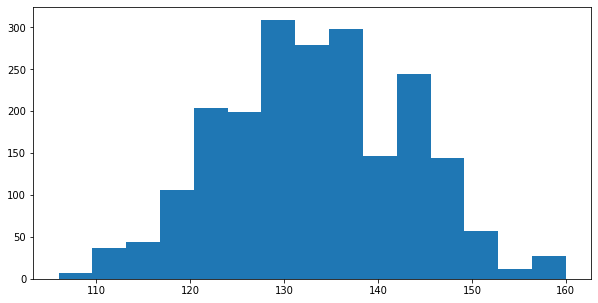

In [ ]:
#Histogram of the fetal Heart Rate
fig=plt.figure(figsize=(10,5))
plt.hist(data['LB'], bins=15)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


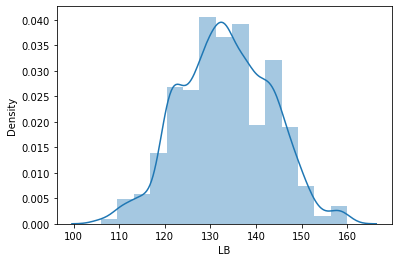

In [ ]:
sns.distplot(data['LB'], bins=15, kde=True)

(array([441., 260., 348., 412., 324., 209.,  85.,  28.,   5.,   3.]),
 array([0.        , 0.00149254, 0.00298507, 0.00447761, 0.00597015,
        0.00746269, 0.00895522, 0.01044776, 0.0119403 , 0.01343284,
        0.01492537]),
 <a list of 10 Patch objects>)

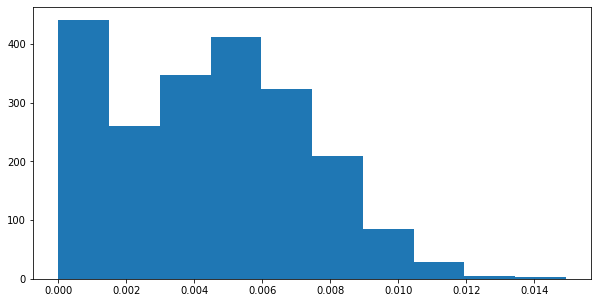

In [ ]:
#Histogram of the Uterine contraction
fig=plt.figure(figsize=(10,5))
plt.hist(data['UC.1'], bins=10)

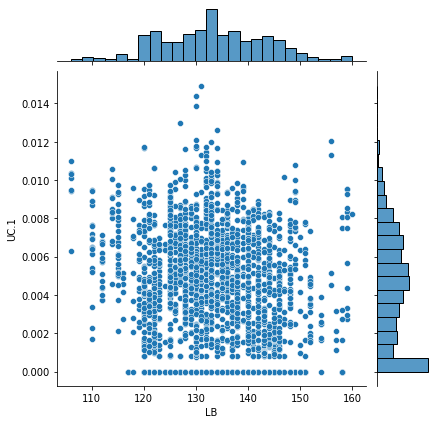

In [ ]:
sns.jointplot(data=data, x='LB', y='UC.1')

### Prepare the data

In [ ]:
X=data.drop('NSP', axis=1)
y=data['NSP']

### Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#scale the data
scaler=StandardScaler()
scaled_train=scaler.fit_transform(X_train)
scaled_test=scaler.transform(X_test)

In [ ]:
X_train=pd.DataFrame(data=scaled_train, columns=X.columns)
X_test=pd.DataFrame(data=scaled_test, columns=X.columns)

### Tunning hyperparameters

In [ ]:
#Logestic Regression
lgr_params={'C':[0.001, 0.01, 0.1, 1.0, 10.0],
            'penalty':["l1","l2"]}

#K nearest Neighbor Model
knn_params={'n_neighbors':range(1,10,2),
            'weights':['uniform','distance'],
            'p':[1,2]}
#Decision Tree
dtree_params = {'max_depth':[2,4,6],
                'min_samples_split':[0.1, 0.2, 0.05],
                'criterion': ['gini','entropy'],
                'min_samples_leaf':[1,2,3]}
#Support Vector machine
svc_params = {'kernel': ['rbf','linear','poly','sigmoid'],
              'gamma': [0.1, 1.0,10.0],
              'coef0':[0,1,2],
              'degree':[2,3,4]}

### Results of individual Models

In [ ]:
#Logestic Regression
start_time=time.time()
lgr_model=GridSearchCV(estimator=LogisticRegression(max_iter=10000,solver= 'liblinear'),param_grid=lgr_params, cv=5)
lgr_model.fit(X_train,y_train)
end_time=time.time()
print(end_time-start_time)

0.4897654056549072


In [ ]:
lgr_model.best_params_

{'C': 1.0}

In [ ]:
lgr_model.best_score_

0.947972972972973

In [ ]:
lgr_train_accuracy_score=accuracy_score(lgr_model.predict(X_train),y_train)
lgr_test_accuracy_score=accuracy_score(lgr_model.predict(X_test),y_test)

In [ ]:
#K nearest Neighbor Model
start_time=time.time()
knn_model=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=knn_params, cv=5)
knn_model.fit(X_train,y_train)
end_time=time.time()
print(end_time-start_time)

2.6976072788238525


In [ ]:
knn_model.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [ ]:
knn_model.best_score_

0.9594594594594594

In [ ]:
knn_train_accuracy_score=accuracy_score(knn_model.predict(X_train),y_train)
knn_test_accuracy_score=accuracy_score(knn_model.predict(X_test),y_test)

In [ ]:
#Decision Tree
start_time=time.time()
dtree_model=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=dtree_params, cv=5)
dtree_model.fit(X_train,y_train)
end_time=time.time()
print(end_time-start_time)

2.3502724170684814


In [ ]:
dtree_model.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 0.1}

In [ ]:
dtree_model.best_score_

0.9824324324324325

In [ ]:
dtree_train_accuracy_score=accuracy_score(dtree_model.predict(X_train),y_train)
dtree_test_accuracy_score=accuracy_score(dtree_model.predict(X_test),y_test)

In [ ]:
#Support Vector machine
start_time=time.time()
svc_model=GridSearchCV(estimator=SVC(),param_grid=svc_params, cv=5)
svc_model.fit(X_train,y_train)
end_time=time.time()
print(end_time-start_time)

37.825918674468994


In [ ]:
svc_model.best_params_

{'coef0': 2, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}

In [ ]:
svc_model.best_score_

0.970945945945946

In [ ]:
svc_train_accuracy_score=accuracy_score(svc_model.predict(X_train),y_train)
svc_test_accuracy_score=accuracy_score(svc_model.predict(X_test),y_test)

In [ ]:
pd.DataFrame({'model':['LGR','KNN','DTree','SVM'],
              'train_score':[lgr_train_accuracy_score,knn_train_accuracy_score,dtree_train_accuracy_score,svc_train_accuracy_score],
              'test_score':[lgr_test_accuracy_score,knn_test_accuracy_score,dtree_test_accuracy_score,svc_test_accuracy_score],
              'average_fit_time':['0.4897654056549072 sec','2.6976072788238525 sec','2.3502724170684814 sec','37.825918674468994 sec']}).set_index('model')

,train_score,test_score,average_fit_time
model,,,
LGR,0.959459,0.957480,0.4897654056549072 sec
KNN,1.000000,0.966929,2.6976072788238525 sec
DTree,0.983108,0.985827,2.3502724170684814 sec
SVM,0.995946,0.973228,37.825918674468994 sec


# Ensemble Models

In [ ]:
#simple classifier
clf1 = LogisticRegression(random_state=1)
clf2 = KNeighborsClassifier()
clf3 = DecisionTreeClassifier()
clf4=SVC()
start_time=time.time()
eclf = VotingClassifier(estimators=[('lr',clf1), ('knn',clf2), ('dtree',clf3),('svc',clf4)],voting='hard', verbose=False)
eclf.fit(X_train,y_train)
end_time=time.time()
print(end_time-start_time)

0.11763453483581543


In [ ]:
eclf.score(X_test,y_test)

0.9637795275590552

In [ ]:
for clf, label in zip([clf1, clf2, clf3, clf4,eclf], ['Logistic Regression', 'K Nearest Neighbor', 'Decision Tree','Support Vector machine','Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.01) [Logistic Regression]
Accuracy: 0.95 (+/- 0.01) [K Nearest Neighbor]
Accuracy: 0.98 (+/- 0.01) [Decision Tree]
Accuracy: 0.96 (+/- 0.01) [Support Vector machine]
Accuracy: 0.96 (+/- 0.01) [Ensemble]


In [ ]:
#Using a soft voting
clf1 = LogisticRegression(random_state=1)
clf2 = KNeighborsClassifier()
clf3 = DecisionTreeClassifier()
clf4=SVC(probability=True)
start_time=time.time()
eclf = VotingClassifier(estimators=[('lr',clf1), ('knn',clf2), ('dtree',clf3),('svc',clf4)],voting='soft', verbose=False)
eclf.fit(X_train,y_train)
end_time=time.time()
print(end_time-start_time)

0.4310264587402344


In [ ]:
eclf.score(X_test,y_test)

0.9826771653543307

In [ ]:
#Adding the weights
clf1 = LogisticRegression(random_state=1)
clf2 = KNeighborsClassifier()
clf3 = DecisionTreeClassifier()
clf4=SVC(probability=True)
start_time=time.time()
eclf = VotingClassifier(estimators=[('lr',clf1), ('knn',clf2), ('dtree',clf3),('svc',clf4)],voting='soft', weights=[0.5,0.5,1,1])
eclf.fit(X_train,y_train)
end_time=time.time()
print(end_time-start_time)

0.4118802547454834


In [ ]:
eclf.score(X_test,y_test)

0.9826771653543307

In [ ]:
eclfsimple_train_accuracy_score=accuracy_score(eclf.predict(X_train),y_train)
eclfsimple_test_accuracy_score=accuracy_score(eclf.predict(X_test),y_test)

In [ ]:
#Using Bagging Techniques
bclf_params={'n_estimators':[10,50,100],
             'max_features':[1,2,3],
             'base_estimator__max_depth':[2,3,4]}


In [ ]:
start_time=time.time()
bagclf=BaggingClassifier(base_estimator=DecisionTreeClassifier(),bootstrap=True)
bclf=GridSearchCV(estimator=bagclf,param_grid=bclf_params)
bclf.fit(X_train,y_train)
end_time=time.time()
print(end_time-start_time)

15.811113119125366


In [ ]:
bclf.best_params_

{'base_estimator__max_depth': 4, 'max_features': 3, 'n_estimators': 50}

In [ ]:
bclf.best_score_

0.9067567567567568

In [ ]:
ebagging_train_accuracy_score=accuracy_score(bclf.predict(X_train),y_train)
ebagging_test_accuracy_score=accuracy_score(bclf.predict(X_test),y_test)

In [ ]:
#Random Forest method
rfclf_params={'n_estimators':[50,100,200],
              'max_depth':[2,4,6],
              'min_samples_split':[1,2,3],
              'criterion': ['gini','entropy'],
              'min_samples_leaf':[1,2,3]}
start_time=time.time()
rfclassifier=RandomForestClassifier()
rfclf=GridSearchCV(estimator=rfclassifier,param_grid=rfclf_params)
rfclf.fit(X_train,y_train)
end_time=time.time()
print(end_time-start_time)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py"

164.0984525680542


In [ ]:
rfclf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [ ]:
rfclf.best_score_

0.975

In [ ]:
rf_train_accuracy_score=accuracy_score(rfclf.predict(X_train),y_train)
rf_test_accuracy_score=accuracy_score(rfclf.predict(X_test),y_test)

In [ ]:
#Using Boosting Method
#AdaBoosting
# Define the grid search parameters
ada_params = {'n_estimators': [50,100,200], 
          'base_estimator__max_depth': [1, 2, 3]}


start_time=time.time()
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
adaboost=GridSearchCV(estimator=ada_boost,param_grid=ada_params)
adaboost.fit(X_train,y_train)
end_time=time.time()
print(end_time-start_time)

26.406128644943237


In [ ]:
adaboost.best_params_

{'base_estimator__max_depth': 3, 'n_estimators': 50}

In [ ]:
adaboost.best_score_

0.9851351351351353

In [ ]:
adaboost_train_accuracy_score=accuracy_score(adaboost.predict(X_train),y_train)
adaboost_test_accuracy_score=accuracy_score(adaboost.predict(X_test),y_test)

In [ ]:
#Gradient Boosting
# Define the grid search parameters
gb_params ={'n_estimators':[50,100,200],
            'max_depth':[2,4,6],
            'min_samples_split':[1,2,3],
            'min_samples_leaf':[1,2,3]}


start_time=time.time()
gboost=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=gb_params)
gboost.fit(X_train,y_train)
end_time=time.time()
print(end_time-start_time)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 586, in fit
    n_stages = self._fit_stages(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 663, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

675.0186839103699


In [ ]:
gboost.best_params_

{'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
gboost.best_score_

0.9878378378378379

In [ ]:
gboost_train_accuracy_score=accuracy_score(gboost.predict(X_train),y_train)
gboost_test_accuracy_score=accuracy_score(gboost.predict(X_test),y_test)

In [ ]:
pd.DataFrame({'model':['LGR','KNN','DTree','SVM','Simple_ensamble Model','Bagging estimator','RandomForest','AdaBoost','GradientBoost'],
              'train_score':[lgr_train_accuracy_score,knn_train_accuracy_score,dtree_train_accuracy_score,svc_train_accuracy_score,
                             eclfsimple_train_accuracy_score,ebagging_train_accuracy_score,rf_train_accuracy_score,adaboost_train_accuracy_score,gboost_train_accuracy_score],
              'test_score':[lgr_test_accuracy_score,knn_test_accuracy_score,dtree_test_accuracy_score,svc_test_accuracy_score,
                            eclfsimple_test_accuracy_score,ebagging_test_accuracy_score,rf_test_accuracy_score,adaboost_test_accuracy_score,gboost_test_accuracy_score],
              'average_fit_time':['0.4897654056549072 sec','2.6976072788238525 sec','2.3502724170684814 sec','37.825918674468994 sec',
                                  '0.4118802547454834 sec','15.811113119125366 sec','164.0984525680542','26.406128644943237 sec','675.0186839103699 sec']}).set_index('model')


                              

,train_score,test_score,average_fit_time
model,,,
LGR,0.959459,0.957480,0.4897654056549072 sec
KNN,1.000000,0.966929,2.6976072788238525 sec
DTree,0.983108,0.985827,2.3502724170684814 sec
SVM,0.995946,0.973228,37.825918674468994 sec
Simple_ensamble Model,0.989865,0.982677,0.4118802547454834 sec
Bagging estimator,0.940541,0.932283,15.811113119125366 sec
RandomForest,0.987162,0.970079,164.0984525680542
AdaBoost,0.997973,0.988976,26.406128644943237 sec
GradientBoost,1.000000,0.988976,675.0186839103699 sec
